In [9]:
from numpy import random as rd
import numpy as np
from typing import List, Callable
import matplotlib.pyplot as plt

lim_inf = -2.7
lim_sup = 7.5


def fn_obj(x):
    return np.sin(x) + np.sin((10.0 / 3.0) * x)

# Definindo comportamento

## Individuo

In [10]:
class Individuo:
    def __init__(
        self, genotipo: float, fn_objetivo: Callable, fabric_fn_mutacao: Callable
    ):
        self.genotipo = genotipo
        self.fenotipo = None
        self.fn_objetivo = fn_objetivo
        self.fn_mutacao = fabric_fn_mutacao(rd.uniform(-1, 1, 1).tolist()[0])
        self.fabric_fn_mutacao = fabric_fn_mutacao

    def get_fenotipo(self) -> float:
        if self.fenotipo is None:
            return self.fn_objetivo(self.genotipo)
        else:
            return self.fenotipo

    def reproduzir_assexuado(self):
        return Individuo(
            self.fn_mutacao(self.genotipo), self.fn_objetivo, self.fabric_fn_mutacao
        )

    def __str__(self) -> str:
        return f"({self.genotipo}, {self.get_fenotipo()})"

    def __lt__(self, obj):
        return (self.get_fenotipo()) < (obj.get_fenotipo())

    def __gt__(self, obj):
        return (self.get_fenotipo()) > (obj.get_fenotipo())

    def __le__(self, obj):
        return (self.get_fenotipo()) <= (obj.get_fenotipo())

    def __ge__(self, obj):
        return (self.get_fenotipo()) >= (obj.get_fenotipo())

    def __eq__(self, obj):
        return self.get_fenotipo() == obj.get_fenotipo()

## População

In [11]:
class Populacao:
    def __init__(self, size: int, fn_objetivo: Callable, fabric_fn_mutacao: Callable):
        self.individuos: List[Individuo] = [
            Individuo(genotipo, fn_objetivo, fabric_fn_mutacao)
            for genotipo in rd.uniform(lim_inf, lim_sup, size).tolist()
        ]
        self.__tam_pop = size

    def sexo_descontrolado(self):
        # print("Gerando filhos assexuadamente")
        filhos: List[Individuo] = []
        for pai in self.individuos:
            filhos.append(pai.reproduzir_assexuado())
        self.individuos.extend(filhos)

    def matar_os_fracos(self):
        # print("Cortando individuos com menor fitness")
        self.individuos.sort()
        self.individuos = self.individuos[0 : self.__tam_pop]

    def melhor_individuo(self) -> Individuo:
        return sorted(self.individuos)[0]

    def individuo_medio(self) -> Individuo:
        return sorted(self.individuos)[int(self.__tam_pop / 2)]

    def __str__(self):
        r = "População:\n"
        for individuo in self.individuos:
            r += individuo.__str__() + ", "
        return r

# Gerando população

In [12]:
def fabrica(n: float):
    return lambda genotipo: n + genotipo


pop = Populacao(size=100, fn_objetivo=fn_obj, fabric_fn_mutacao=fabrica)

## Estado inicial

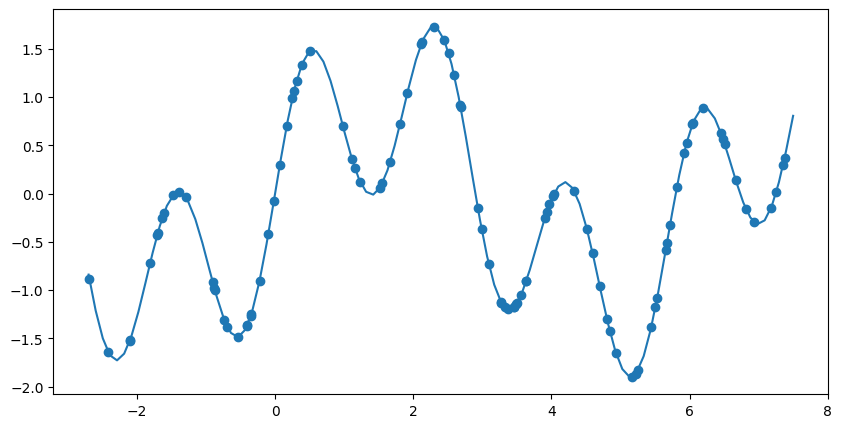

In [13]:
x = list(map(lambda individuo: individuo.genotipo, pop.individuos))
y = list(map(lambda individuo: individuo.get_fenotipo(), pop.individuos))
linha = np.linspace(lim_inf, lim_sup, 100)
fx = np.sin(linha) + np.sin((10.0 / 3.0) * linha)

fig = plt.figure(figsize=(10, 5))
# Create the plot
plt.plot(linha, fx)
plt.scatter(x, y)
plt.show()

## Evoluindo...

In [14]:
melhores_de_cada_geracao: List[Individuo] = []
pau_medio: List[Individuo] = []
quantidade_geracoes = 1000
for i in range(quantidade_geracoes):
    # print(f"Iteração: {i}")
    # print(pop)
    pop.sexo_descontrolado()
    # print(pop)
    pop.matar_os_fracos()
    # print(pop)
    melhores_de_cada_geracao.append(pop.melhor_individuo())
    pau_medio.append(pop.individuo_medio())
# print ("\n\n\nMelhores")
print(f"Melhor individuo final: {melhores_de_cada_geracao[-1]}")
# for melhor in melhores_de_cada_geracao:
# print(melhor, end=", ")
# print(f"Melhor de todos: {melhores_de_cada_geracao[-1]}" )

Melhor individuo final: (5.146043834089017, -1.89959878125986)


# Plotando

## Melhores individuos de cada geração

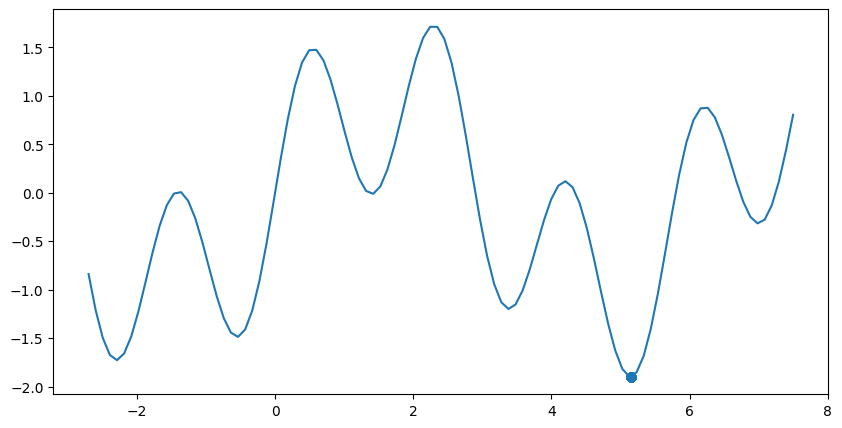

In [15]:
x = list(map(lambda individuo: individuo.genotipo, melhores_de_cada_geracao))
y = list(map(lambda individuo: individuo.get_fenotipo(), melhores_de_cada_geracao))
linha = np.linspace(lim_inf, lim_sup, 100)
fx = np.sin(linha) + np.sin((10.0 / 3.0) * linha)

fig = plt.figure(figsize=(10, 5))
# Create the plot
plt.plot(linha, fx)
plt.scatter(x, y)
plt.show()

## Individuos médios

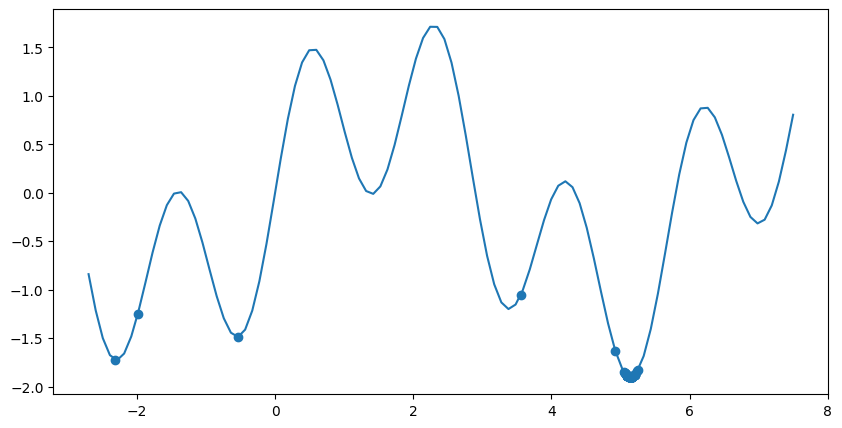

In [16]:
x = list(map(lambda individuo: individuo.genotipo, pau_medio))
y = list(map(lambda individuo: individuo.get_fenotipo(), pau_medio))
linha = np.linspace(lim_inf, lim_sup, 100)
fx = np.sin(linha) + np.sin((10.0 / 3.0) * linha)

fig = plt.figure(figsize=(10, 5))
# Create the plot
plt.plot(linha, fx)
plt.scatter(x, y)
plt.show()